# Статистический анализ данных / Python
## Задание 3

**Правила:**

* Дедлайн **1 декаюря 23:59**.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[MADE19] Фамилия Имя - задание 3"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов), которую можно сделать с помощью печати в файл через инструменты браузера.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. 
* Разделяйте код вычислений и отрисовки графиков. Так будет удобнее вам и проверяющим.
* Задание стоит **7 баллов**.

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline


### Задача.
Существует примета, что если перед вами дорогу перебегает черный кот, то скоро случится неудача. 
Вы же уже достаточно хорошо знаете статистику и хотите проверить данную примету. 
Сформулируем задачу на математическом языке. 

Пусть $X_1, ..., X_n \sim Bern(p)$ --- проведенные наблюдения, где $X_i = 1$, если в $i$-м испытании случилась неудача после того, как черный кот перебежал дорогу, а $p$ --- неизвестная вероятность такого события. 
Вы хотите проверить гипотезу $\mathsf{H}_0\colon p=1/2$ (отсутствие связи между черным котом и неудачей) против альтернативы $\mathsf{H}_1\colon p>1/2$ (неудача происходит чаще если черный кот перебегает дорогу).

Известно, что $S = \left\{T(X) \geqslant c_\alpha\right\}$, где $T(X) = \sum X_i$, является равномерно наиболее мощным критерием для проверки этих гипотез. 
Чему при этом равно $c_\alpha$ и как определяется p-value?

**Ответ:**  $c_\alpha$ - критическое значение статистики Т(Х), соответсвующее уровню доверия  $\alpha$. По сути - количество "единиц" в выборке, при достижении которого вероятность того, что нулевая гипотеза верна, меньше либо равна $\alpha$. P-value в таком случае не превышает $\alpha$

Для начала проверьте, что критерий работает.
Возьмите несколько значений $n$ и реализаций статистики $T(X)$.
В каждом случае найдите значение $c_\alpha$ и p-value.
Оформите это в виде таблицы (можно через `pandas.DataFrame`).

Пользуйтесь функциями из `scipy.stats`. Внимательно проверьте правильность строгих и нестрогих знаков.

In [2]:
#Генерирует выбокру и считает по ней статистику
def GetT(n , p):
    X = sps.bernoulli(p=p).rvs(size=n)
    T = np.sum(X)
    return T

#возвращает критическое значение статистики, соответствующее заданному уровню доверия alpha (правостороння альтернатива)
#при вероятнсти p
def GetCa(alpha, n, p):
    ca = sps.binom.ppf(1-alpha, n=n, p = p)
    return ca

# возвращает p-value для заданной статистики Т, при вероятности в нулевой гипотезе p
def getPvalue(T, n, p):
    p_value = 1 - sps.binom.cdf(n = n , p = p, k = T)
    return p_value

print(GetT(100 , 0.5))
print(GetCa(0.05, 100 , 0.5))
print(getPvalue(50, 100 , 0.5))

59
58.0
0.4602053813064103


In [3]:
ns = [100, 1000, 10000, 100000]
t_list = list()
ca_list = list()
p_value_list = list()
data = pd.DataFrame()
for n in ns:
    T = GetT(n , 0.5)
    ca = GetCa(0.1, n, 0.5)
    p_value = getPvalue(T, n, 0.5)

    t_list.append(T)
    ca_list.append(ca)
    p_value_list.append(p_value)
    
data['n'] = ns
data['T(X)'] = t_list
data['ca (a=0.1)'] = ca_list
data['p-value'] = p_value_list
data

,n,T(X),ca (a=0.1),p-value
0,100,59,56.0,0.028444
1,1000,508,520.0,0.295442
2,10000,5077,5064.0,0.060569
3,100000,50069,50203.0,0.330129


Для каких истинных значений $p$ с точки зрения практики можно считать, что связь между черным котом и неудачей есть? 

**Ответ:** для $p$ большего вероятности $p$, соответствующей случаям, когда кота мы не встречали

Теперь сгенерируйте 10 выборок для двух случаев: 1). $n=5, p=0.75$; 2). $n=10^5, p=0.51$. 
В каждом случае в виде таблицы выведите реализацию статистики $T(X)$, соответствующее p-value и 0/1 -- отвергается ли $\mathsf{H}_0$ (выводите 1, если отвергается).

In [4]:
def get_table(n, p):
    result_table = pd.DataFrame()
    t_list = list()
    ca_list = list()
    p_value_list = list()
    decision = list()
    
    result = pd.DataFrame()

    for i in range(10):
        T = GetT(n , p)
        ca = GetCa(0.1, n, 0.5)
        p_value = getPvalue(T, n, 0.5)

        t_list.append(T)
        ca_list.append(ca)
        p_value_list.append(p_value)
        decision.append(1 if T>=ca else 0)


    result['n'] = [n]*10
    result['T(X)'] = t_list
    result['ca (a=0.1)'] = ca_list
    result['p-value'] = p_value_list
    result['decision'] = decision
    return result

In [5]:
n1 = 5
p1 = 0.75
get_table(n1, p1)

,n,T(X),ca (a=0.1),p-value,decision
0,5,3,4.0,0.18750,0
1,5,3,4.0,0.18750,0
2,5,3,4.0,0.18750,0
3,5,4,4.0,0.03125,1
4,5,3,4.0,0.18750,0
5,5,3,4.0,0.18750,0
6,5,5,4.0,0.00000,1
7,5,4,4.0,0.03125,1
8,5,5,4.0,0.00000,1
9,5,3,4.0,0.18750,0


In [6]:
n2 = 10**5
p2 = 0.51
get_table(n2, p2)

,n,T(X),ca (a=0.1),p-value,decision
0,100000,51158,50203.0,1.173506e-13,1
1,100000,51025,50203.0,4.405698e-11,1
2,100000,50881,50203.0,1.235978e-08,1
3,100000,50903,50203.0,5.505026e-09,1
4,100000,51245,50203.0,1.665335e-15,1
5,100000,50890,50203.0,8.898286e-09,1
6,100000,50874,50203.0,1.592415e-08,1
7,100000,50988,50203.0,2.025869e-10,1
8,100000,50867,50203.0,2.047735e-08,1
9,100000,51097,50203.0,1.940115e-12,1


**Вывод:** При малом количестве наблюдений несмотря на высокую вероятность возникновения события нулевая гипотеза отвергается не всегда. При большом количестве наблюдений достаточно небольшого отклонения вероятности от 0.5 для отвержения нулевой гипотезы

Возникает задача подбора оптимального размера выборки.

Для этого сначала зафиксируйте значение $p^* > 1/2$, которое будет обладать следующим свойством.
Если истинное $p > p^*$, то такое отклонение от $1/2$ с практической точки зрения признается существенным, то есть действительно чаще случается неудача после того, как черный кот перебегает дорогу.
В противном случае отклонение с практической точки зрения признается несущественным.

Теперь для некоторых $n$ постройте графики функции мощности критерия при $1/2 < p < 1$ и уровне значимости 0.05.
Выберите такое $n^*$, для которого функция мощности дает значение 0.8 при $p^*$.

In [7]:
p_star = 0.6

In [8]:
#вычисляет мощность критерия при заданном количестве наблюдений (n) и вероятности (p)
def getPower(n, p):
    Ca = GetCa(0.05, n, 0.5)
    #вычисялю бетту. Для этого считаю какая доля распределения лежит правее полученного значени Т в распределении
    # свойственном критерию при верной альтернативной гипотезе
    betta = sps.binom.cdf(k=Ca, n=n, p=p)   
    power = 1-betta
    return power

In [9]:
def plotPower(n):
    p_space = np.linspace(0.5, 1, 50, endpoint=False)
    power_list = list()
    for p in p_space:
        power = getPower(n, p)
        power_list.append(power)
    return power_list, p_space     

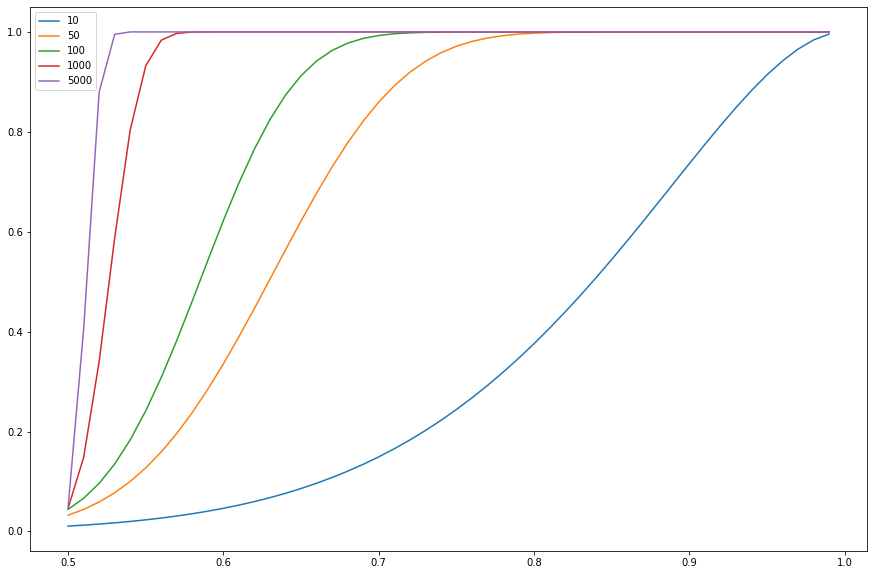

In [10]:
plt.figure(figsize=(15,10))
for n in [10, 50, 100, 1000, 5000]:
    powers, ps = plotPower(n)
    plt.plot(ps,powers, label = n)
plt.legend()

In [11]:
print(getPower(159, p_star))
print(getPower(160, p_star))

0.7867185377483619
0.8129001664096127


**Ответ:** Количество наблюдений необходимое для мощности 0.8 = 160

Для выбранного $n^*$ проведите эксперимент, аналогичный проведенным ранее экспериментам, сгенерировав выборки для следующих истинных значений $p$: 1). $1/2 < p < p^*$; 2). $p > p^*$.

In [12]:
n_star = 160

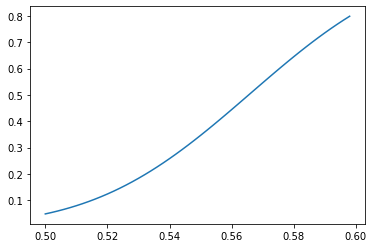

In [13]:
#1
ps = np.linspace(0.5, p_star, 50, endpoint=False)
power_list = list()

for p in ps:
    power = getPower(n_star, p)
    power_list.append(power)
        
plt.plot(ps,power_list)

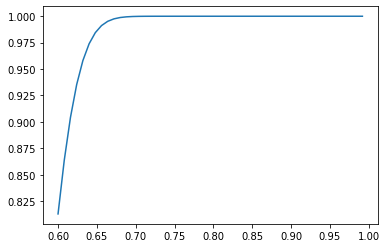

In [14]:
#2
ps = np.linspace(p_star, 1, 50, endpoint=False)
power_list = list()

for p in ps:
    power = getPower(n_star, p)
    power_list.append(power)
        
plt.plot(ps,power_list)

**Вывод:**

После преодоления порогового значения вероятности, соответствующего мощности критерия 0.8, мощность критерия начинает быстро возрастать